## In this notebook I will implement the CNN model from ZUYD into pytorch

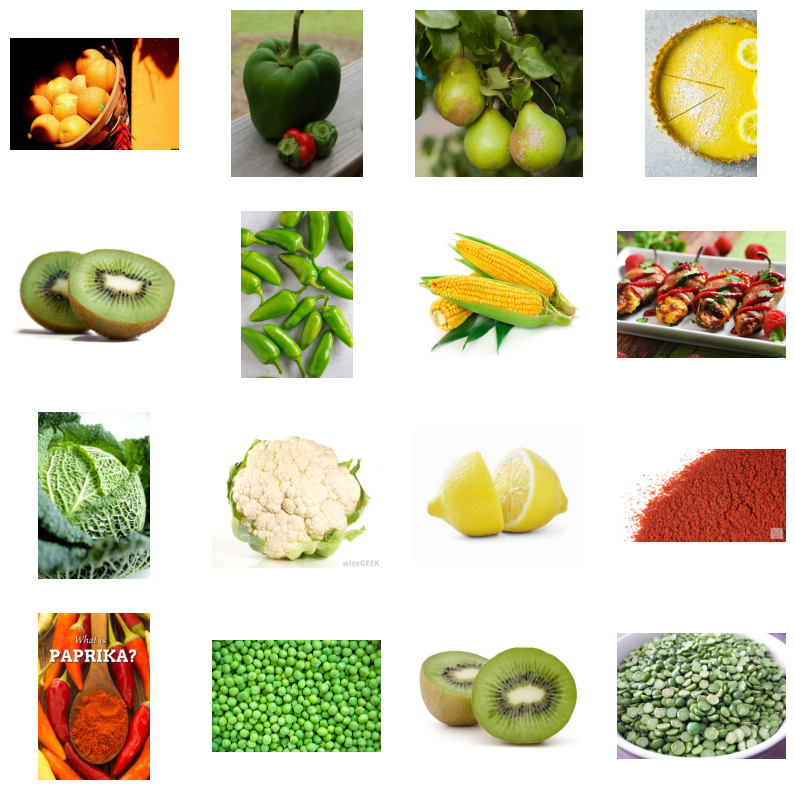

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# the directory path
test_dir = r"C:\Users\tijnk\Desktop\Coding school!!\fruitclassifier\fruitclassifierzuyd\dataset\train"

# Get a list of all the sub directories or classes
classes = os.listdir(test_dir)

# An empty list to store all the file paths
image_paths = []

# Loop through each class folder and collect image paths
for cls in classes:
    class_dir = os.path.join(test_dir, cls)
    images = os.listdir(class_dir)
    for img in images:
        image_paths.append(os.path.join(class_dir, img))


# Select 16 random images
random_images = random.sample(image_paths, 16)

# Set up a 4x4 grid for plotting
fig, axes = plt.subplots(4, 4, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    img = mpimg.imread(random_images[i])
    ax.imshow(img)
    ax.axis('off')

plt.show()

In [10]:
import os
from PIL import Image

input_dirs = {
    'train': r'C:\Users\tijnk\Desktop\Coding school!!\fruitclassifier\fruitclassifierzuyd\dataset\train',
    'validation': r'C:\Users\tijnk\Desktop\Coding school!!\fruitclassifier\fruitclassifierzuyd\dataset\validation',
    'test': r'C:\Users\tijnk\Desktop\Coding school!!\fruitclassifier\fruitclassifierzuyd\dataset\test'
}

output_dir = r'C:\Users\tijnk\Desktop\Coding school!!\fruitclassifier\fruitclassifierzuyd\pytorch implement\output_pytorch'

for subset in input_dirs.keys():
    subset_dir = os.path.join(output_dir, subset)
    if not os.path.exists(subset_dir):
        os.makedirs(subset_dir)

def resize_and_save_image(input_path, output_path, size=(128, 128)):
    try:
        with Image.open(input_path) as img:

            if img.mode == "P":
                img = img.convert("RGBA")

            if img.mode in ("RGBA", "LA") or (img.mode == "P" and "transparency" in img.info):
                img = img.convert("RGB")
            img = img.resize(size, Image.LANCZOS)
            img.save(output_path, format="JPEG")
    except Exception as e:
        print(f"Error processing {input_path}: {e}")


def process_directory(input_directory, output_directory):
    for root, dirs, files in os.walk(input_directory):
        relative_path = os.path.relpath(root, input_directory)
        output_path = os.path.join(output_directory, relative_path)
        if not os.path.exists(output_path):
            os.makedirs(output_path)

            # Process each image file
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                input_file_path = os.path.join(root, file_name)
                output_file_path = os.path.join(output_path, file_name)
                resize_and_save_image(input_file_path, output_file_path)

# Process each directory separately
for subset, dir_path in input_dirs.items():
    process_directory(dir_path, os.path.join(output_dir, subset))

print("Resizing and saving images completed.")


Resizing and saving images completed.
